In [ ]:
!pip install pycaret > /dev/null 2>&1

In [ ]:
!pip install --upgrade numpy==1.24.3 pandas==2.0.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 98.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 89.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.3
    Uninstalling pandas-2.2.3:
      Successfully uninstalled pandas-2.2.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.0.3 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.3 which is incompatible.
mizani 0.13.3 requires pandas>=2.2.0, but you have pandas 2.0.3 which is incompatible.
xarray 2025.1.2 requires pandas>=2.1, but you have pandas 2.0.3 which is incompatible.
albumentat

In [ ]:
import pandas as pd

In [ ]:
#import pandas as pd
from pycaret.classification import *

data = pd.read_csv('realistic_high_accuracy_sentiment_dataset.csv')

clf = setup(
    data,
    target='sentiment',
    text_features=['review_text'],
    train_size=0.8,
    session_id=42,
    # fix_imbalance=True
    # preprocess=False
    # fold=10,                             # 10-Fold Cross-Validation
    # use_gpu=True,                         # Use GPU if available
    # #silent=True,                         # Avoid confirmation prompts
    # verbose=True
)

# Train a model
best_model = compare_models()

,Description,Value
0,Session id,42
1,Target,sentiment
2,Target type,Binary
3,Target mapping,"Negative: 0, Positive: 1"
4,Original data shape,"(6000, 8)"
5,Transformed data shape,"(6000, 71)"
6,Transformed train set shape,"(4800, 71)"
7,Transformed test set shape,"(1200, 71)"
8,Numeric features,1
9,Text features,1


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9781,0.9776,0.9781,0.9782,0.9781,0.9562,0.9563,1.0230
nb,Naive Bayes,0.9781,0.9742,0.9781,0.9782,0.9781,0.9562,0.9563,0.2190
ridge,Ridge Classifier,0.9781,0.9784,0.9781,0.9782,0.9781,0.9562,0.9563,0.2720
knn,K Neighbors Classifier,0.9777,0.9789,0.9777,0.9778,0.9777,0.9554,0.9555,0.2830
et,Extra Trees Classifier,0.9637,0.9774,0.9637,0.9641,0.9637,0.9275,0.9278,0.5120
svm,SVM - Linear Kernel,0.8275,0.9390,0.8275,0.8594,0.8135,0.6550,0.6785,0.3040
dt,Decision Tree Classifier,0.5000,0.5000,0.5000,0.2500,0.3333,0.0000,0.0000,0.2140
rf,Random Forest Classifier,0.5000,0.9768,0.5000,0.2500,0.3333,0.0000,0.0000,0.5270
qda,Quadratic Discriminant Analysis,0.5000,0.5829,0.5000,0.2500,0.3333,0.0000,0.0000,0.2450
ada,Ada Boost Classifier,0.5000,0.5000,0.5000,0.2500,0.3333,0.0000,0.0000,0.3560


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

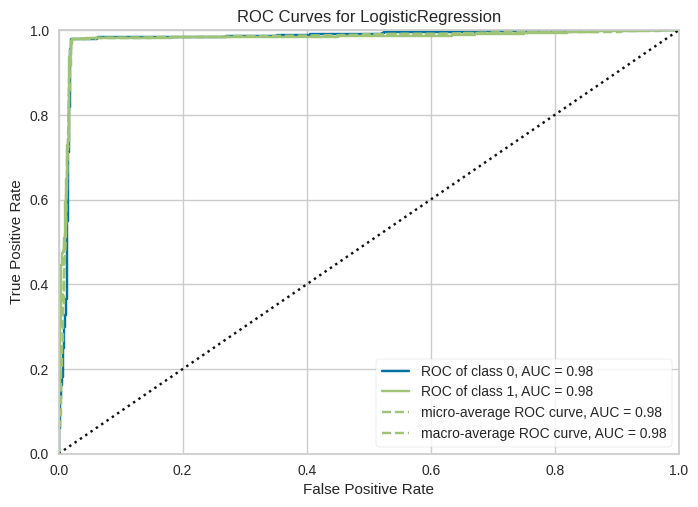

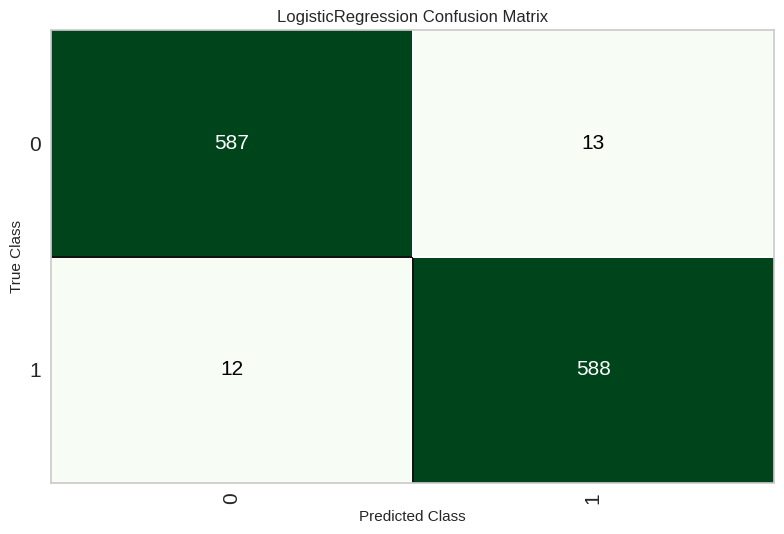

In [ ]:
# Step 6: Evaluate best model
evaluate_model(best_model)

# Step 7: Plot ROC Curve
plot_model(best_model, plot='auc')

# Step 8: Plot Confusion Matrix
plot_model(best_model, plot='confusion_matrix')

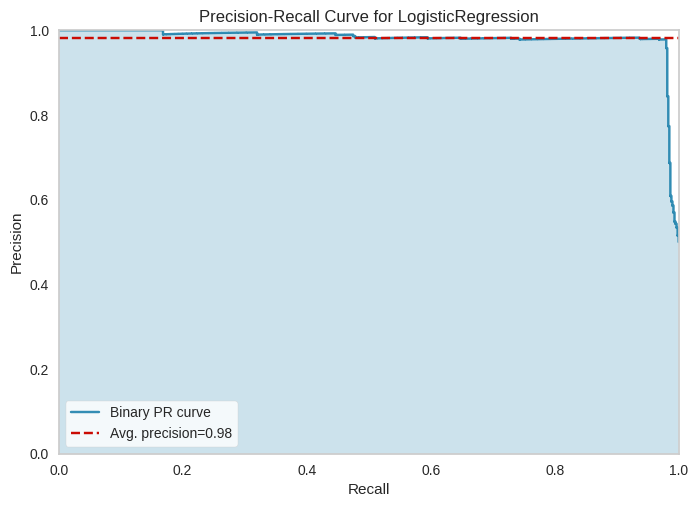

In [ ]:
# Plot Precision-Recall curve
plot_model(best_model, plot='pr')


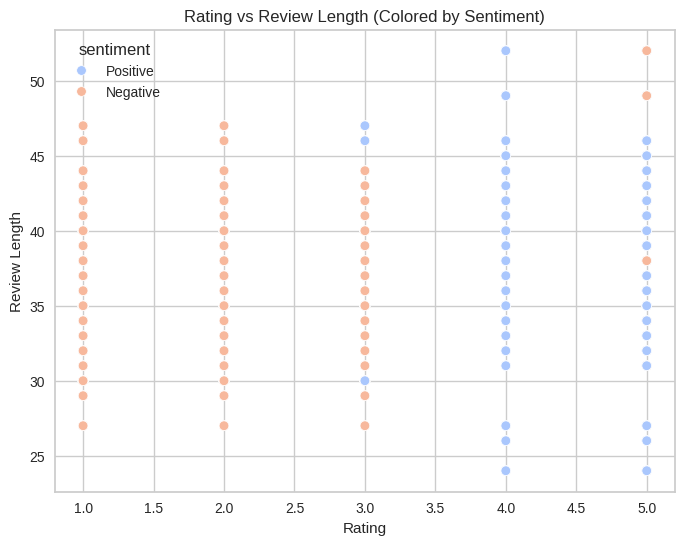

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is the DataFrame containing the dataset
df = pd.read_csv('realistic_high_accuracy_sentiment_dataset.csv')

# Create a new feature 'review_length' as the length of the review text
df['review_length'] = df['review_text'].apply(len)

# Scatter plot: 'rating' vs 'review_length'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='rating', y='review_length', data=df, hue='sentiment', palette='coolwarm')
plt.title('Rating vs Review Length (Colored by Sentiment)')
plt.xlabel('Rating')
plt.ylabel('Review Length')
plt.show()


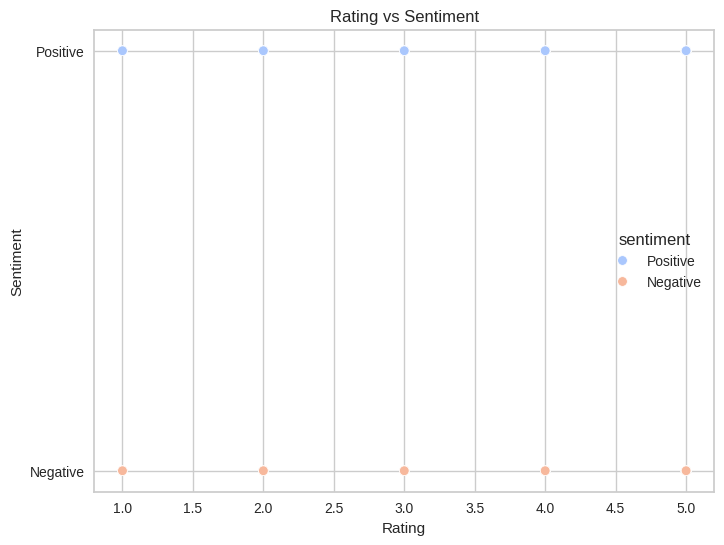

In [ ]:
# Scatter plot: 'rating' vs 'sentiment' (target variable)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='rating', y='sentiment', data=df, hue='sentiment', palette='coolwarm')
plt.title('Rating vs Sentiment')
plt.xlabel('Rating')
plt.ylabel('Sentiment')
plt.show()


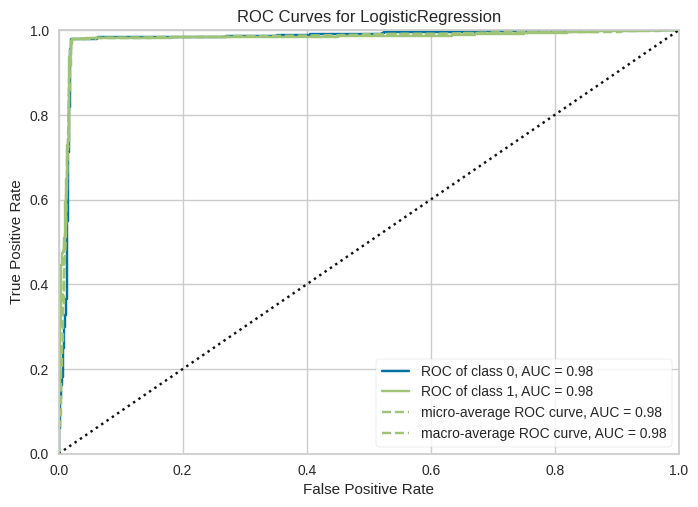

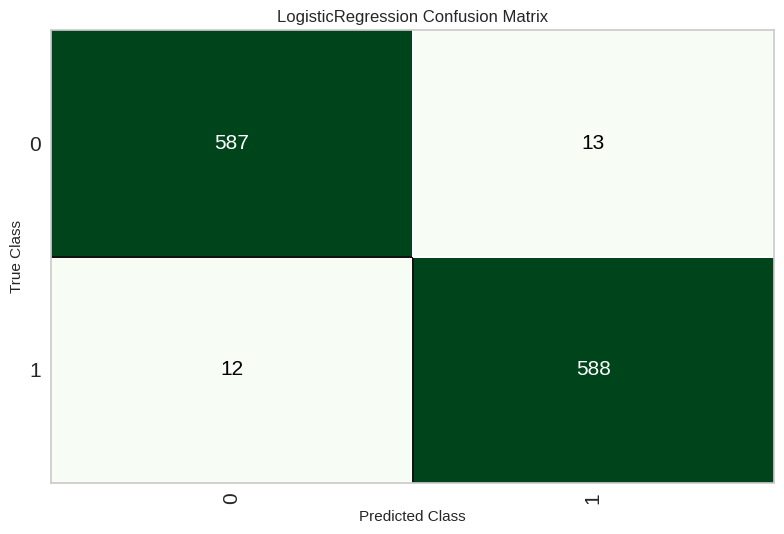

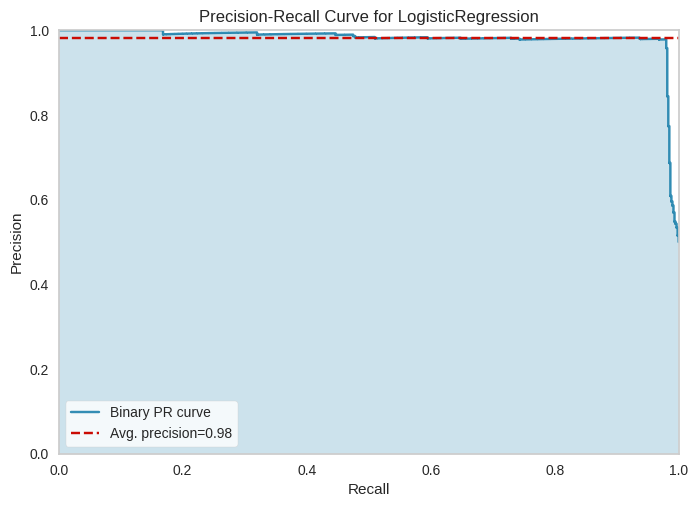

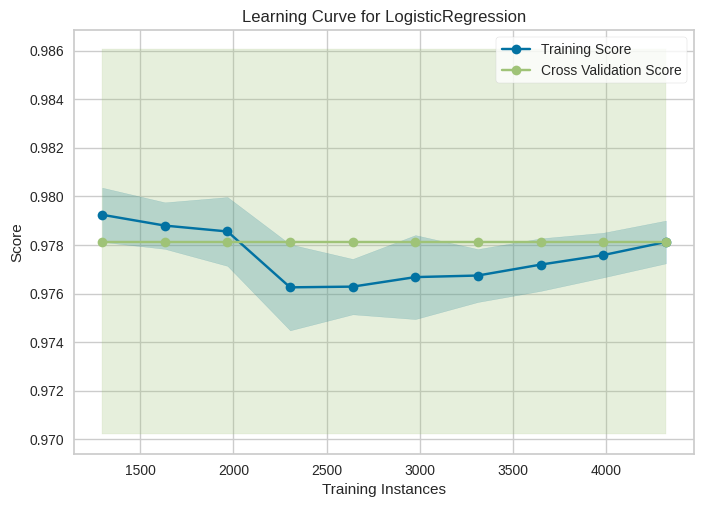

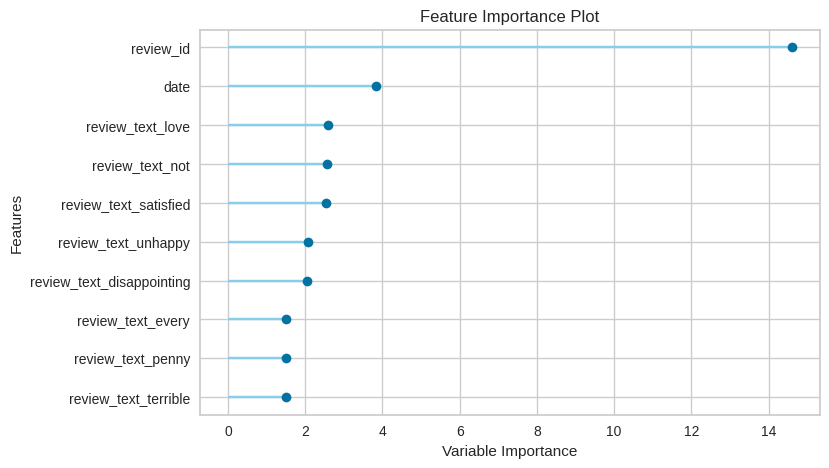

In [ ]:
# Plot ROC Curve using 'auc'
plot_model(best_model, plot='auc')

# Plot Confusion Matrix
plot_model(best_model, plot='confusion_matrix')

# Plot Precision-Recall Curve
plot_model(best_model, plot='pr')

# Plot Learning Curve
plot_model(best_model, plot='learning')

# Plot Feature Importance
plot_model(best_model, plot='feature')

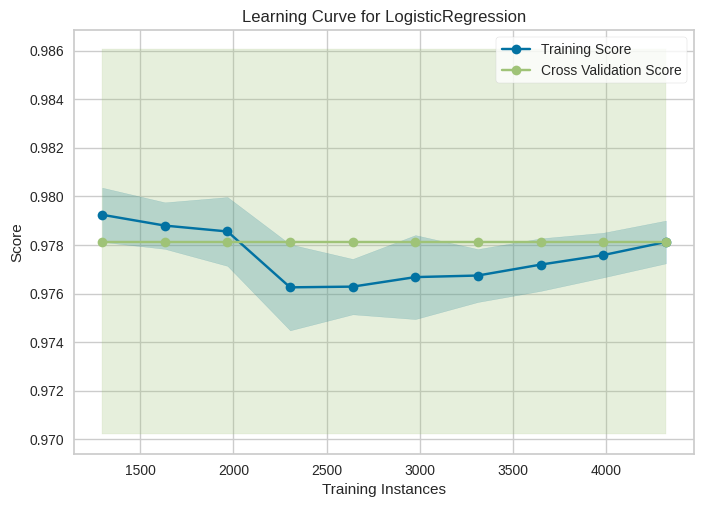

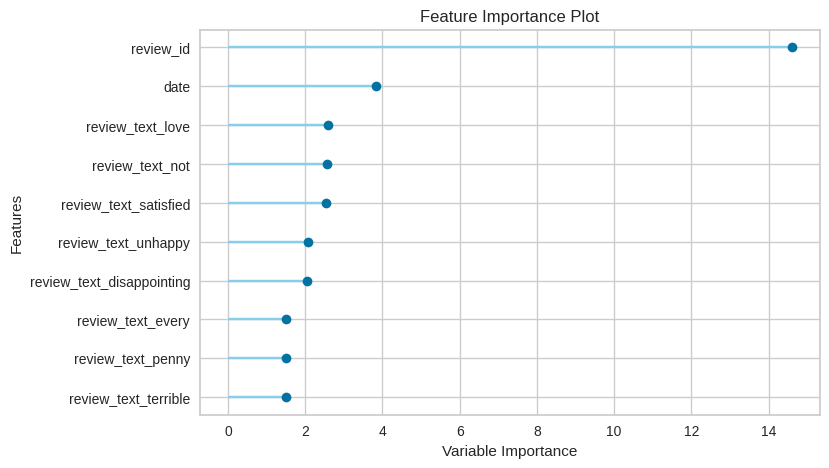

In [ ]:
# ✅ 4. Learning Curve
plot_model(best_model, plot='learning')

# ✅ 5. Feature Importance (useful for tabular datasets)
plot_model(best_model, plot='feature')

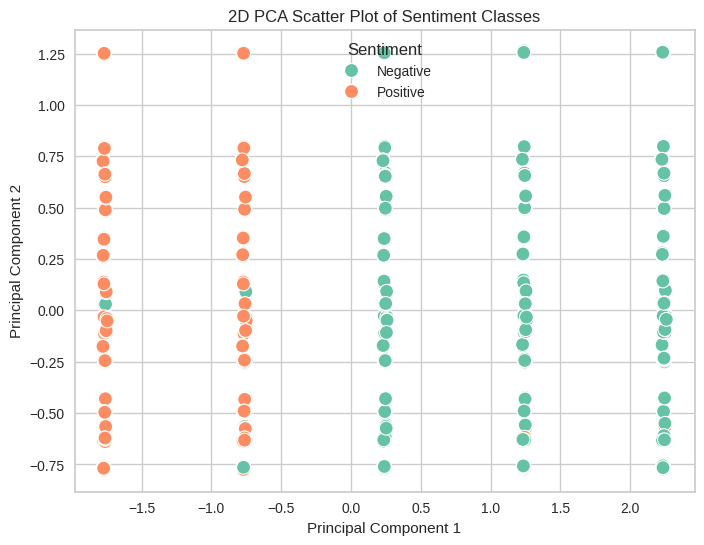

In [ ]:
import pandas as pd
from pycaret.classification import *
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already trained your model
# setup(...) and best_model = compare_models() is done

# Get final data and target used inside PyCaret
X = get_config('X')
y = get_config('y')

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=X.select_dtypes(include=['object', 'category']).columns)
# Select object and categorical columns for one-hot encoding

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a scatter dataframe
scatter_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
scatter_df['Sentiment'] = y.values

# Plot scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=scatter_df, x='PC1', y='PC2', hue='Sentiment', s=100, palette='Set2')
plt.title('2D PCA Scatter Plot of Sentiment Classes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

X = get_config('X')
y = get_config('y')

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

scatter_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
scatter_df['Label'] = y.values

plt.figure(figsize=(8, 6))
sns.scatterplot(data=scatter_df, x='PC1', y='PC2', hue='Label', palette='Set1', s=80)
plt.title('PCA Scatter Plot of Classes')
plt.grid(True)
plt.show()


ValueError: Cannot cast object dtype to float64

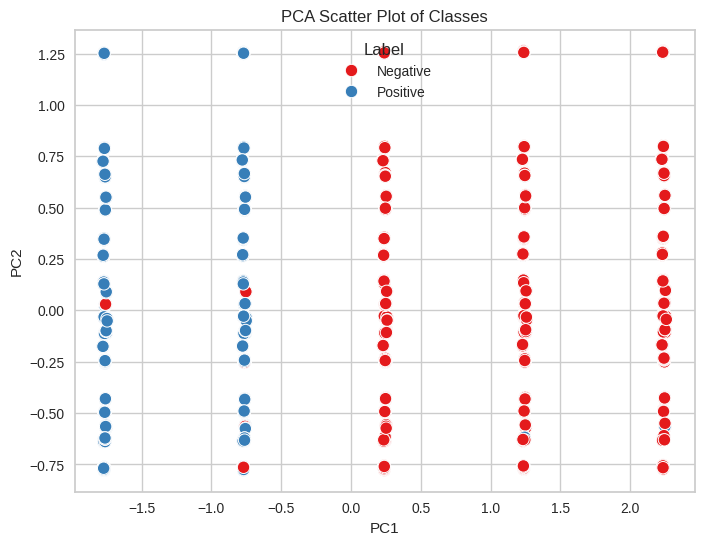

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pycaret.classification import *

X = get_config('X')
y = get_config('y')

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=X.select_dtypes(include=['object', 'category']).columns)
# Select object and categorical columns for one-hot encoding


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

scatter_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
scatter_df['Label'] = y.values

plt.figure(figsize=(8, 6))
sns.scatterplot(data=scatter_df, x='PC1', y='PC2', hue='Label', palette='Set1', s=80)
plt.title('PCA Scatter Plot of Classes')
plt.grid(True)
plt.show()

In [ ]:
plot_model(best_model, plot='roc', save=True)
plot_model(best_model, plot='confusion_matrix', save=True)
plot_model(best_model, plot='pr', save=True)
plot_model(best_model, plot='learning', save=True)
plot_model(best_model, plot='error', save=True)


ValueError: Plot Not Available. Please see docstring for list of available Plots.

In [ ]:
plot_model(best_model, plot='confusion_matrix', save=True)
plot_model(best_model, plot='pr', save=True)  # Precision-Recall curve
plot_model(best_model, plot='learning', save=True) # Learning Curve
plot_model(best_model, plot='feature', save=True) # Feature importance for text features
plot_model(best_model, plot='class_report', save=True) # Classification report
plot_model(best_model, plot='boundary', save=True) # Decision boundary (for 2D or 3D data)
plot_model(best_model, plot='calibration', save=True) # Calibration curve
plot_model(best_model, plot='vc', save=True) # Validation curve
plot_model(best_model, plot='error', save=True) # Error plot
plot_model(best_model, plot='manifold', save=True) # Manifold learning plot
plot_model(best_model, plot='parameter', save=True) # Hyperparameter tuning plot
plot_model(best_model, plot='lift', save=True) # Lift curve
plot_model(best_model, plot='gain', save=True) # Gain curve
plot_model(best_model, plot='ks', save=True) # KS statistic plot

,Parameters
C,1.0
class_weight,None
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,1000
multi_class,auto
n_jobs,None
penalty,l2


'KS Statistic Plot.png'